# Data Science Job Postings Analysis and Salary Model Predictor
Start 10/03/2025

In this notebook, I examine a recently released dataset found on Kaggle that showcases data science roles within the last year. I have been generally curious about the data science job market and different aspects of roles available. 

In this notebook, I will be examining different features and relatedness to better understand the data science job postings data set. Additionally, I will attempt a couple different prediction models to ideally predict salary, as relevant for interested applicants.

### Personal Notes:

This is my initial project after a hiatus, just exploring EDA, analysis, ML concepts I find interesting and want a refresher on. This will be conducted in VS Code, which I have only logged a couple hours on prior to this (primarily used Jupyter notebook via Anaconda Nav previously). This notebook will be updated on Github as I work through different parts and/or come back to make updates. 

The dataset can be found at: 
https://www.kaggle.com/datasets/elahehgolrokh/data-science-job-postings-with-salaries-2025/data

In [30]:
import pandas as pd
df = pd.read_csv("data_science_job_posts_2025.csv")
df.head()

,job_title,seniority_level,status,company,location,post_date,headquarter,industry,ownership,company_size,revenue,salary,skills
0,data scientist,senior,hybrid,company_003,"Grapevine, TX . Hybrid",17 days ago,"Bentonville, AR, US",Retail,Public,€352.44B,Public,"€100,472 - €200,938","['spark', 'r', 'python', 'scala', 'machine lea..."
1,data scientist,lead,hybrid,company_005,"Fort Worth, TX . Hybrid",15 days ago,"Detroit, MI, US",Manufacturing,Public,"155,030",€51.10B,"€118,733","['spark', 'r', 'python', 'sql', 'machine learn..."
2,data scientist,senior,on-site,company_007,"Austin, TX . Toronto, Ontario, Canada . Kirkla...",a month ago,"Redwood City, CA, US",Technology,Public,"25,930",€33.80B,"€94,987 - €159,559","['aws', 'git', 'python', 'docker', 'sql', 'mac..."
3,data scientist,senior,hybrid,company_008,"Chicago, IL . Scottsdale, AZ . Austin, TX . Hy...",8 days ago,"San Jose, CA, US",Technology,Public,"34,690",€81.71B,"€112,797 - €194,402","['sql', 'r', 'python']"
4,data scientist,NaN,on-site,company_009,On-site,3 days ago,"Stamford, CT, US",Finance,Private,"1,800",Private,"€114,172 - €228,337",[]


### Feature Engineering 
The dataset has a provided fetaure engineering python file which cleans duplicate entries and incorrect Nan values                      


In [31]:
import feature_engineering as fe

engineer = fe.FeatureEngineer(df)
df_cleaned = engineer.engineer_all() ### Subject the dataset to the provided feature engineering python file, which cleans the data and standardizes (eg dates to numbers).
df_cleaned.head()

,job_title,seniority_level,status,company,location,headquarter,industry,ownership,company_size,revenue,skills,min_salary,max_salary,mean_salary
0,data scientist,senior,hybrid,company_003,United States,United States,Retail,Public,NaN,3.524400e+11,"['spark', 'r', 'python', 'scala', 'machine lea...",100472.0,200938.0,150705.0
1,data scientist,lead,hybrid,company_005,United States,United States,Manufacturing,Public,155030.0,5.110000e+10,"['spark', 'r', 'python', 'sql', 'machine learn...",118733.0,118733.0,118733.0
2,data scientist,senior,on-site,company_007,multi-location,United States,Technology,Public,25930.0,3.380000e+10,"['aws', 'git', 'python', 'docker', 'sql', 'mac...",94987.0,159559.0,127273.0
3,data scientist,senior,hybrid,company_008,multi-location,United States,Technology,Public,34690.0,8.171000e+10,"['sql', 'r', 'python']",112797.0,194402.0,153599.5
4,data scientist,NaN,on-site,company_009,United States,United States,Finance,Private,1800.0,NaN,[],114172.0,228337.0,171254.5


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
df.isnull().sum()

job_title            3
seniority_level     60
status             256
company              0
location             2
post_date            0
headquarter          0
industry             0
ownership           47
company_size         0
revenue             15
salary               0
skills               0
dtype: int64

In [34]:
df_cleaned.isnull().sum()

job_title            3
seniority_level     58
status             253
company              0
location             0
headquarter          0
industry             0
ownership           32
company_size        38
revenue            517
skills               0
min_salary           0
max_salary           0
mean_salary          0
dtype: int64

In [35]:
df_cleaned

,job_title,seniority_level,status,company,location,headquarter,industry,ownership,company_size,revenue,skills,min_salary,max_salary,mean_salary
0,data scientist,senior,hybrid,company_003,United States,United States,Retail,Public,NaN,3.524400e+11,"['spark', 'r', 'python', 'scala', 'machine lea...",100472.0,200938.0,150705.0
1,data scientist,lead,hybrid,company_005,United States,United States,Manufacturing,Public,155030.0,5.110000e+10,"['spark', 'r', 'python', 'sql', 'machine learn...",118733.0,118733.0,118733.0
2,data scientist,senior,on-site,company_007,multi-location,United States,Technology,Public,25930.0,3.380000e+10,"['aws', 'git', 'python', 'docker', 'sql', 'mac...",94987.0,159559.0,127273.0
3,data scientist,senior,hybrid,company_008,multi-location,United States,Technology,Public,34690.0,8.171000e+10,"['sql', 'r', 'python']",112797.0,194402.0,153599.5
4,data scientist,NaN,on-site,company_009,United States,United States,Finance,Private,1800.0,NaN,[],114172.0,228337.0,171254.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,data scientist,senior,NaN,company_171,Asia,United States,Technology,Public,524598.0,1.202900e+11,"['pytorch', 'python', 'sql', 'machine learning...",33288.0,53080.0,43184.0
940,machine learning engineer,senior,NaN,company_134,Other,United States,Retail,Public,865456.0,8.387800e+11,"['amazon', 'machine learning']",64290.0,64290.0,64290.0
941,data scientist,midlevel,on-site,company_395,United States,United States,Retail,Public,55150.0,3.629000e+10,"['spark', 'aws', 'r', 'python', 'scala', 'sql'...",145904.0,166510.0,156207.0
942,data scientist,midlevel,on-site,company_395,United States,United States,Retail,Public,55110.0,3.634000e+10,"['spark', 'aws', 'r', 'python', 'scala', 'sql'...",159149.0,181595.0,170372.0


#   EDA

In [36]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 938 entries, 0 to 943
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_title        935 non-null    object 
 1   seniority_level  880 non-null    object 
 2   status           685 non-null    object 
 3   company          938 non-null    object 
 4   location         938 non-null    object 
 5   headquarter      938 non-null    object 
 6   industry         938 non-null    object 
 7   ownership        906 non-null    object 
 8   company_size     900 non-null    float64
 9   revenue          421 non-null    float64
 10  skills           938 non-null    object 
 11  min_salary       938 non-null    float64
 12  max_salary       938 non-null    float64
 13  mean_salary      938 non-null    float64
dtypes: float64(5), object(9)
memory usage: 109.9+ KB


In [37]:
df_cleaned["skills"].value_counts().head(20)

skills
[]                                                                                                  196
['sql', 'machine learning', 'r', 'python']                                                           40
['machine learning']                                                                                 31
['sql', 'r', 'python']                                                                               28
['sql', 'machine learning', 'python']                                                                23
['machine learning', 'python']                                                                       17
['sql', 'python']                                                                                    12
['r', 'python', 'sql', 'machine learning', 'tableau']                                                11
['machine learning', 'r', 'python']                                                                  10
['tableau', 'sql', 'r', 'python']                        

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

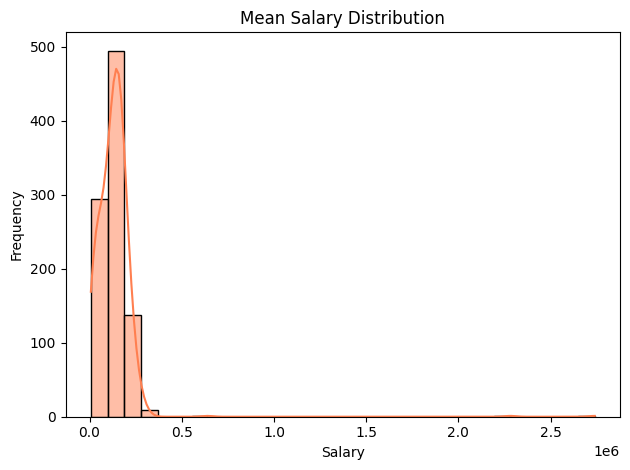

In [39]:
# Salary distribution plot
plt.Figure(figsize=(10, 6))
sns.histplot(df_cleaned['mean_salary'], bins=30, kde=True, color='coral')
plt.title('Mean Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [40]:
# Descriptive statistics for mean_salary
df_cleaned['mean_salary'].describe()

count    9.380000e+02
mean     1.317336e+05
std      1.290955e+05
min      7.055000e+03
25%      7.646000e+04
50%      1.347225e+05
75%      1.697328e+05
max      2.739979e+06
Name: mean_salary, dtype: float64

<Axes: >

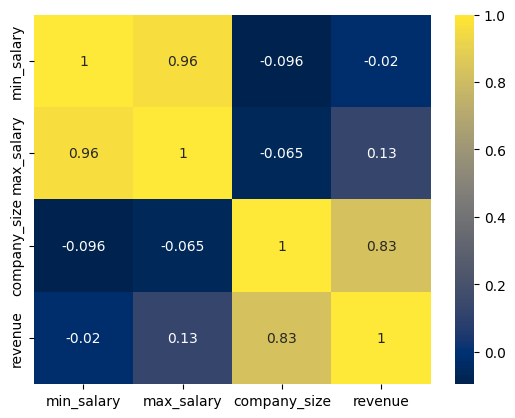

In [41]:
# Heatmap to visulize min and max salary with seniority and industry
sns.heatmap(df_cleaned[['min_salary', 'max_salary', 'company_size', 'revenue']].corr(), annot=True, cmap='cividis')

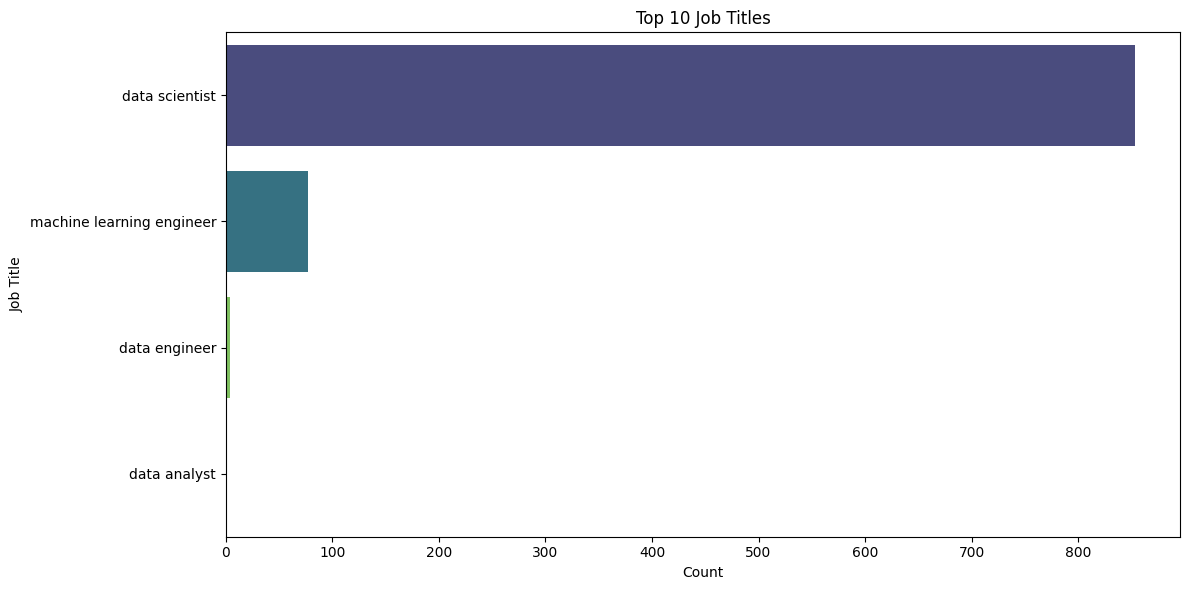

In [42]:
#Plot most common job titles
plt.figure(figsize=(12, 6))
sns.countplot(y='job_title', data=df_cleaned, order=df_cleaned['job_title'].value_counts().index[:10], hue='job_title', palette='viridis', legend=False)
plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

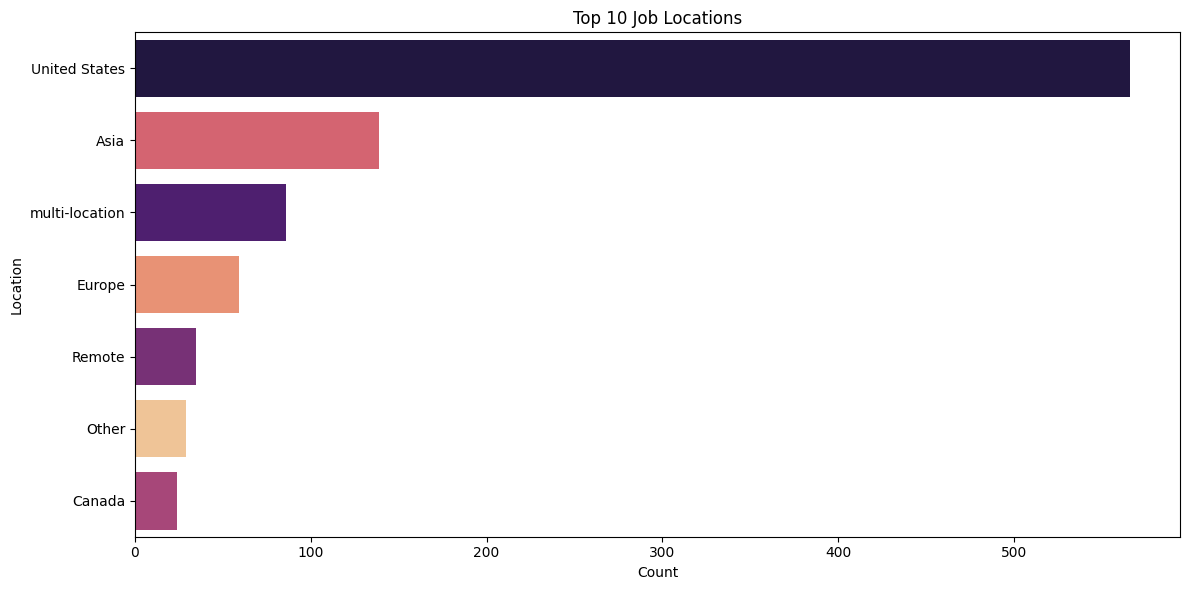

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(y='location', data=df_cleaned, order=df_cleaned['location'].value_counts().index[:10], hue='location', palette='magma', legend=False)
plt.title('Top 10 Job Locations')
plt.xlabel('Count')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


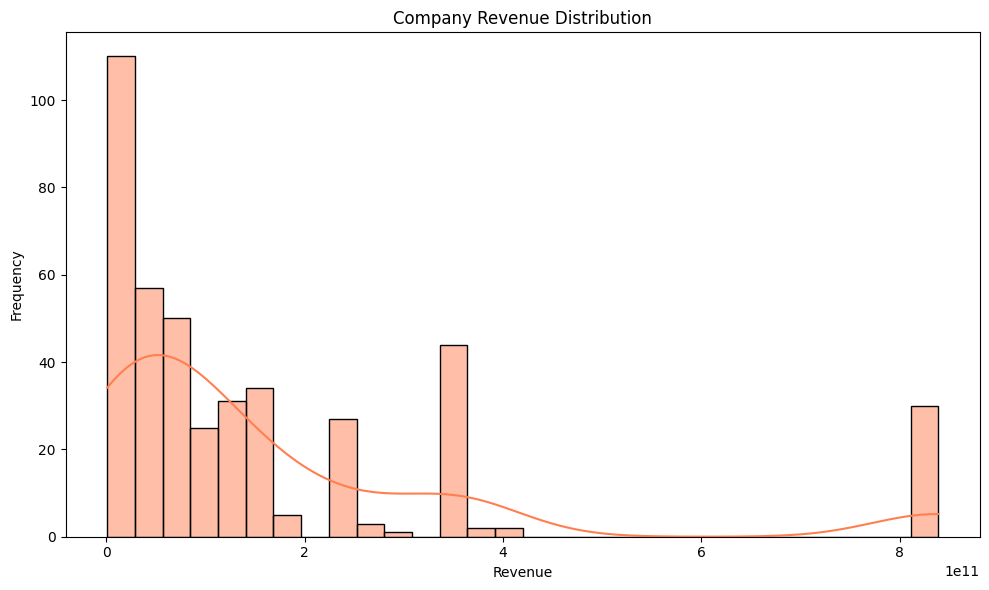

In [44]:
# Display company revenue distribution histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['revenue'], bins=30, kde=True, color='coral')
plt.title('Company Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

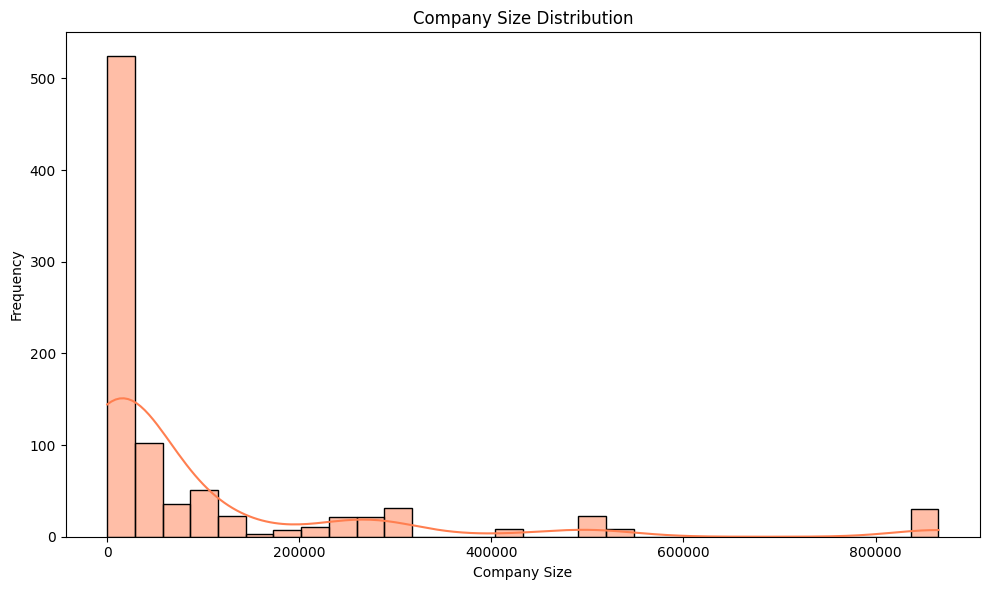

In [45]:
# Histogram of company size
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['company_size'], bins=30, kde=True, color='coral')
plt.title('Company Size Distribution')
plt.xlabel('Company Size')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### EDA Thoughts
There aren't that many datapoints in this dataset unfortunately. When I think of all the listings that I have seen on job boards, I know there are more than ~900 lisitngs, thus I wish there was more variety and a larger set so there weren't so many pockets of data outside of normal distributions for different features.

# Preprocessing

Additonal preprocessing to go along with the provided feature_engineering

Yet to do, possible ideas:
- Examine outliers, trim them out (however, not a lot of job posting entries which makes me hesitant on trimming)
- Since I am US based, convert to USD


# Analysis/Statistics

This section is designated for any questions that may be derived or supported by the dataset (in the realm of Hypothesis testing however, do not have actual hypothesis to test)

### Hypothesis Test

Null Hypothesis: Salaries are the same across industries 

Alt Hypothesis: Salaries differ across industries

ANOVA One-Way: 

In [46]:
# One-way ANOVA: test whether mean_salary differs by industry
import numpy as np
import pandas as pd
from scipy import stats
try:
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    from statsmodels.stats.anova import anova_lm
    STATS_MODELS_AVAILABLE = True
except Exception:
    STATS_MODELS_AVAILABLE = False

# Prepare data: drop rows without mean_salary or industry
df_anova = df_cleaned.dropna(subset=['mean_salary', 'industry']).copy()
# Keep industries with at least 3 samples to avoid degenerate groups
group_counts = df_anova['industry'].value_counts()
valid_groups = group_counts[group_counts >= 3].index.tolist()
df_anova = df_anova[df_anova['industry'].isin(valid_groups)].copy()

print(f'Samples used: {len(df_anova)} rows, {len(valid_groups)} industries (>=3 samples)')

# Descriptive stats by industry
desc = df_anova.groupby('industry')['mean_salary'].agg(['count','mean','std','median']).sort_values('count', ascending=False)
print("Descriptive statistics (top groups):")
print(desc.head(20).to_string())

# Prepare groups for ANOVA
groups = [g['mean_salary'].values for _, g in df_anova.groupby('industry')]
if len(groups) < 2:
    print('Not enough groups for ANOVA (need at least 2).')
else:
    # Levene test for equal variances (robust to non-normality)
    levene_stat, levene_p = stats.levene(*groups, center='median')
    print(f"Levene test for equal variances: stat={levene_stat:.4f}, p={levene_p:.4g}")

    # SciPy one-way ANOVA (assumes independent groups)
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"SciPy one-way ANOVA: F={f_stat:.4f}, p={p_value:.4g}")

    alpha = 0.05
    if p_value < alpha:
        print(f"Conclusion (alpha={alpha}): reject H0 — evidence that mean salary differs across industries (p={p_value:.4g})")
    else:
        print(f"Conclusion (alpha={alpha}): fail to reject H0 — no strong evidence that mean salary differs across industries (p={p_value:.4g})")

    # Statsmodels OLS + ANOVA (gives SS, df, F, PR(>F)) if available
    if STATS_MODELS_AVAILABLE:
        formula = 'mean_salary ~ C(industry)'
        model = ols(formula, data=df_anova).fit()
        anova_res = anova_lm(model, typ=2)
        print("\nStatsmodels ANOVA (type II):")
        print(anova_res)
    else:
        print('\nstatsmodels not available; installed environment may lack statsmodels. SciPy result shown above.')

Samples used: 938 rows, 8 industries (>=3 samples)
Descriptive statistics (top groups):
               count           mean            std     median
industry                                                     
Technology       576  131695.888889  158365.385174  127871.25
Finance          127  126188.889764   61361.891205  135636.50
Retail           110  153748.450000   50067.244272  161222.00
Healthcare        83  123990.265060   54142.799815  127872.50
Education         19   96321.842105   49000.699987   75995.00
Energy            12  134385.666667   45263.965661  137690.00
Manufacturing      7  104063.357143   34861.983824  103072.50
Logistics          4   77152.125000  100791.583387   26758.50
Levene test for equal variances: stat=1.4875, p=0.1679
SciPy one-way ANOVA: F=0.8854, p=0.5173
Conclusion (alpha=0.05): fail to reject H0 — no strong evidence that mean salary differs across industries (p=0.5173)

statsmodels not available; installed environment may lack statsmodels. SciPy r

Fail to reject the null, based on the dataset there is not enough statistical significance to suggest that data science mean salary differs between industries

# Prediction Models

The most desirable prediction for this dataset would be mean_salary for interested data scientists or data professionals who may want to base their own salaries and features appropriately or are looking at job postings. Seeing as salary is a key metric in the dataset, I tried a couple different models to predict mean salary based on specific features. 

### Random Forest

In [47]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score   

In [48]:
#Random Forest 
# Prep data
df_model = df_cleaned.dropna(subset=['mean_salary']).copy()

features = ['seniority_level', 'status', 'location', 'industry', 'revenue', 'company_size']
target = 'mean_salary'

X = df_model[features]
y = df_model[target]

categorical_features = ['seniority_level', 'status', 'location', 'industry']
numeric_features = ['revenue', 'company_size']

# Preprocess categorical and numerical features and column transformer
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

preprocess = ColumnTransformer(
    transformers=[
        ('cat', cat_pipe, categorical_features),
        ('num', num_pipe, numeric_features)
    ],
    remainder='drop'
)

# Create rf model pipeline
rf = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)
pipe = Pipeline([
    ('prep', preprocess),
    ('model', rf)
])

# Hold out eval
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Holdout MAE: {mae:,.2f}")

#Cross validation MAE
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(
    pipe, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1
)
print(f"CV MAE: {(-cv_scores).mean():,.2f} ± {(-cv_scores).std():,.2f}")

Holdout MAE: 30,837.96
CV MAE: 35,082.57 ± 4,380.45
CV MAE: 35,082.57 ± 4,380.45


These seemingly better results relative to other models (cv, cv + parameters, and TF+IDF) could be from an 'easy' holdout set. Should confirm

In [49]:
from sklearn.model_selection import KFold, RandomizedSearchCV
import numpy as np

cv = KFold(n_splits=5, shuffle=True, random_state=42)

param_dist = {
    "model__criterion": ["absolute_error", "squared_error"],
    "model__n_estimators": [300, 500, 800, 1200, 1500],
    "model__max_depth": [None, 10, 15, 20, 30],
    "model__min_samples_leaf": [1, 2, 3, 5, 8, 10],
    "model__min_samples_split": [2, 5, 10, 15, 20],
    "model__max_features": ["sqrt", 0.5, 0.7],
    "model__bootstrap": [True],
    "model__max_samples": [None, 0.6, 0.8]  # only used if bootstrap=True
}

search = RandomizedSearchCV(
    pipe,
    param_dist,
    n_iter=40,
    scoring="neg_mean_absolute_error",
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
search.fit(X, y)

print("Best CV MAE:", -search.best_score_)
print("Best params:", search.best_params_)

best_pipe = search.best_estimator_
# best_pipe.fit(X_train, y_train)
# print("Holdout MAE:", mean_absolute_error(y_test, best_pipe.predict(X_test)))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best CV MAE: 35455.034163826946
Best params: {'model__n_estimators': 300, 'model__min_samples_split': 5, 'model__min_samples_leaf': 3, 'model__max_samples': None, 'model__max_features': 0.5, 'model__max_depth': 20, 'model__criterion': 'absolute_error', 'model__bootstrap': True}
Best CV MAE: 35455.034163826946
Best params: {'model__n_estimators': 300, 'model__min_samples_split': 5, 'model__min_samples_leaf': 3, 'model__max_samples': None, 'model__max_features': 0.5, 'model__max_depth': 20, 'model__criterion': 'absolute_error', 'model__bootstrap': True}


### TF-IDF + Elastic Net

This technique allows utilization of tf-idf for the skills feature, which each job posting has unique variation in the list of skills mentioned. The goal is to examine if skills mentioned may have an impact on prediction. Additionally, this applies to job_title as well which has less variation in options however, may lead to a trend for certain titles to support higher or lower mean salary. 

Elastic Net ideally, allows us to test this large, potentially correlated tf-idf + ohe feature set by selecting features that matter (L1) while stabilizing groups of similar features (L2), hoping to reduce overfitting, keeping important features, and generalize.

In [50]:
# Libraries for modeling
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import ElasticNetCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import make_scorer, mean_absolute_error

In [51]:
# Check which variables are lists vs strings
df_cleaned.dtypes

job_title           object
seniority_level     object
status              object
company             object
location            object
headquarter         object
industry            object
ownership           object
company_size       float64
revenue            float64
skills              object
min_salary         float64
max_salary         float64
mean_salary        float64
dtype: object

In [52]:
# Keep only relevant rows (need mean salary)
df_model = df_cleaned.copy()
df_model = df_model[df_model["mean_salary"].notna()].reset_index(drop=True)

# Create revenue missing indicator prior
df_model['revenue_missing'] = df_model['revenue'].isna().astype(int)

TEXT_COLS = ["job_title", "skills"]
CAT_COLS  = ["seniority_level", "industry", "location", "ownership", "status"]
NUM_SIZE  = ["company_size"]
NUM_REV   = ["revenue"]
FLAG_COLS = ["revenue_missing"] 

# Features not suitable 
EXCLUDE = ["min_salary", "max_salary", "company", "headquarter"]

# Features transformed to use, from explicit set above
FEATURES = TEXT_COLS + CAT_COLS + NUM_SIZE + NUM_REV + FLAG_COLS

df_model = df_cleaned.copy()
df_model = df_model[df_model["mean_salary"].notna()].reset_index(drop=True)
df_model["revenue_missing"] = df_model["revenue"].isna().astype(int)

X = df_model.loc[:, FEATURES]   # guarantees 2-D
y = df_model["mean_salary"]     # 1-D Series is fine for y

print(type(X), X.shape)  # expect: <class 'pandas.core.frame.DataFrame'> (n_samples, n_features)
print(type(y), y.shape)  # expect: <class 'pandas.core.series.Series'> (n_samples,)
missing_in_X = [c for c in FEATURES if c not in df_model.columns]
print("Missing features:", missing_in_X)  # expect: []
assert hasattr(X, "shape") and len(X.shape) == 2, "X must be 2D (DataFrame)"


# Transformer to flatten, TfidfVectorizer expects 1D input
flatten =  FunctionTransformer(lambda x: x.ravel(), accept_sparse=True)

# Text pipelines
title_text = Pipeline([
     ("impute", SimpleImputer(strategy="constant", fill_value="")),
    ("flatten", flatten),
    ("tfidf", TfidfVectorizer(ngram_range=(1, 2), max_features=2000, lowercase=True))
])

skills_text = Pipeline([
    ("impute", SimpleImputer(strategy="constant", fill_value="")),
    ("flatten", flatten),
    ("tfidf", TfidfVectorizer(ngram_range=(1, 2), max_features=3000, lowercase=True))
])

# Categorical pipeline
cat_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=True))
])

# Numerical pipeline for company size
size_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("log1p", FunctionTransformer(np.log1p, feature_names_out="one-to-one")),
    ("scale", StandardScaler(with_mean=False))
])

# Numeric: revenue (median -> log1p -> scale)
revenue_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("log1p", FunctionTransformer(np.log1p, feature_names_out="one-to-one")),
    ("scale", StandardScaler(with_mean=False))
])

# Revenue missing flag (0/1 already set)
flag_passthrough = "passthrough"

# Assemble all features
preprocessor = ColumnTransformer(
    transformers=[
        ("title_tfidf",  title_text,  ["job_title"]),   # was "job_title"
        ("skills_tfidf", skills_text, ["skills"]),       # was "skills"
        ("cats",         cat_pipe,    CAT_COLS),
        ("size_num",     size_pipe,   NUM_SIZE),
        ("revenue_num",  revenue_pipe, NUM_REV),
        ("rev_missing",  "passthrough", FLAG_COLS),
    ],
    remainder="drop",
    sparse_threshold=0.3
)

#Elastic Net model with cross-validation & log1p target transform
enet = ElasticNetCV(
    l1_ratio=[0.05, 0.2, 0.5, 0.8, 0.95],   # try several mixes of L1/L2
    alphas=np.logspace(-3, 2, 30),          # regularization strength grid
    cv=5,
    n_jobs=-1,
    max_iter=20000,
    random_state=42
)

model = TransformedTargetRegressor(
    regressor=enet,
    func=np.log1p,
    inverse_func=np.expm1
)

pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", model)
])

# Cross validated MAE
mae = make_scorer(mean_absolute_error, greater_is_better=False)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(pipe, X, y, scoring=mae, cv=cv, n_jobs=-1)
print(f"CV MAE (mean ± std): {-scores.mean():.2f} ± {scores.std():.2f}")



<class 'pandas.core.frame.DataFrame'> (938, 10)
<class 'pandas.core.series.Series'> (938,)
Missing features: []
CV MAE (mean ± std): 38600.50 ± 5343.39
CV MAE (mean ± std): 38600.50 ± 5343.39


# 